# Import Library

In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visuzliation Setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import colors
import seaborn as sns

In [2]:
root = os.path.join(os.getcwd(), 'DATA')

## Import Data

In [3]:
df_raw = pd.read_csv(os.path.join(root, 'preprocessed_train.csv'))

# Train

## Set Metric

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Function to print the MAE (Mean Absolute Error) score
def print_score(m : LinearRegression):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

## Set Data

In [48]:
target = df_train['P_PRICE']
df_train.drop(columns = 'P_PRICE', inplace=True)

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Function for splitting training and validation data
def split_vals(a, n : int): 
    return a[:n].copy(), a[n:].copy()

val_perc = 0.1 # % to use for validation set
n_valid = int(val_perc * 100000) 
n_trn = len(df_train)-n_valid

# Split data
raw_train, raw_valid = split_vals(df_train, n_trn)
X_train, X_valid = split_vals(df_train, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

- metric 선정하기
- base model 선정 > 전처리 최소화 + linear regression model 로 정확도 구하기
- 모델마다 최적화하기
- 모델끼리 비교하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=500,random_state=0)
model.fit(x_train,y_train)
cross = cross_val_score(model,x_test,y_test,cv = 5)

print('cross_tree',cross.mean())

In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train,y_train)
cross_svr = cross_val_score(model,x_test,y_test,cv = 5)
print('cross_svr',cross_svr.mean())

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=3)
model.fit(x_train,y_train)
cross_xgboost = cross_val_score(model,x_test,y_test,cv = 5)

print('cross_xgboost : ',cross_xgboost.mean())

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

cross_linear = cross_val_score(model,x_test,y_test,cv = 5)
print(cross_linear)
print('cross_linear : ',cross_linear.mean())

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor().fit(x_train,y_train)
cross_MLP = cross_val_score(model,x_test,y_test,cv = 5)

print('croos_MLP : ',cross_MLP.mean())

# ============================참고===========================

# 4. Model Data

## Set metrics(MAE)

In [36]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Function to print the MAE (Mean Absolute Error) score
# This is the metric used by Kaggle in this competition
def print_score(m : LinearRegression):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

## XGBoost Model 
### for train sampling

### import the model

In [37]:
import xgboost

In [38]:
sample = train.iloc[0:100000]
original = sample.drop(columns=['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired'])
target = sample['winPlacePerc']

### split data for training and validation

In [39]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Function for splitting training and validation data
def split_vals(a, n : int): 
    return a[:n].copy(), a[n:].copy()

val_perc = 0.1 # % to use for validation set
n_valid = int(val_perc * 100000) 
n_trn = len(original)-n_valid

# Split data
raw_train, raw_valid = split_vals(sample, n_trn)
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

Sample train shape:  (90000, 53) 
Sample target shape:  (90000,) 
Sample validation shape:  (10000, 53)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:19: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.


In [40]:
# Train basic model
#m1 = LinearRegression()
#m1.fit(X_train, y_train)
#print_score(m1)

In [41]:
# Train basic model
m1 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m1.fit(X_train, y_train)
print_score(m1)

['mae train: ', 0.0550490599384843, 'mae val: ', 0.06475269047975063]


### for df_wrangle sampling

In [42]:
## 바꿔야함
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

## Split data for training and validation
csv를 pickle, json으로 바꿔서 한다.
모델 별로 파일을 나누장
데이터로 나눠도 됨..

비쥬얼라이젼을 좀 더 이쁘게 해서
상관계수 예쁘게 분석


In [43]:
n_trn = len(original)-n_valid

# Split data
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

Sample train shape:  (90000, 56) 
Sample target shape:  (90000,) 
Sample validation shape:  (10000, 56)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.


In [44]:
# Train basic model
#m2 = LinearRegression()
#m2.fit(X_train, y_train)
#print_score(m2)

In [45]:
# Train basic model
m2 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m2.fit(X_train, y_train)
print_score(m2)

['mae train: ', 0.049243022895292705, 'mae val: ', 0.05997060938482284]


## Feature Importance

In [46]:
def xgb_feat_importance(m, df):
     return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [47]:
## 바꿔야함
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

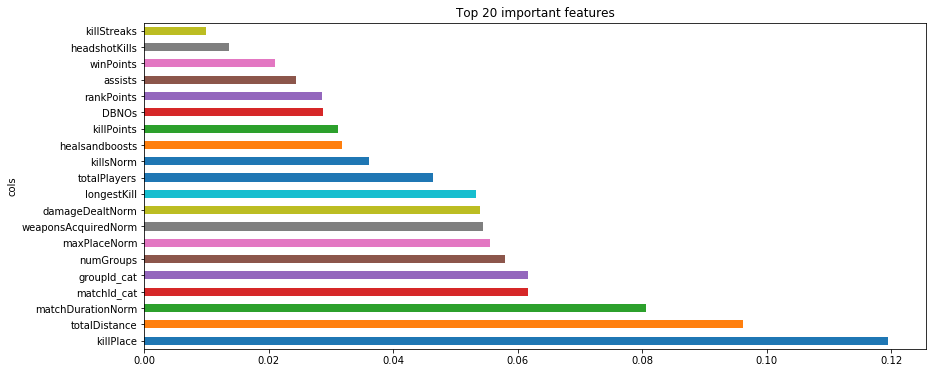

In [48]:
# What are the most predictive features according to our basic random forest model
fi = xgb_feat_importance(m2, original); fi[:10]

# Plot a feature importance graph for the 20 most important features
plot1 = fi[:20].plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh', title='Top 20 important features')

In [49]:
# Keep only significant features
#to_keep = fi[fi.imp>0.005].cols
to_keep = fi[fi.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep.describe()

Significant features:  23


count            23
unique           23
top       killPlace
freq              1
Name: cols, dtype: object

In [50]:
to_keep

3               killPlace
21          totalDistance
16      matchDurationNorm
55            matchId_cat
54            groupId_cat
7               numGroups
18           maxPlaceNorm
19    weaponsAcquiredNorm
17        damageDealtNorm
6             longestKill
14           totalPlayers
15              killsNorm
20         healsandboosts
4              killPoints
1                   DBNOs
8              rankPoints
0                 assists
13              winPoints
2           headshotKills
5             killStreaks
9                 revives
36        matchType_squad
37    matchType_squad-fpp
Name: cols, dtype: object

In [51]:
list(to_keep)

['killPlace',
 'totalDistance',
 'matchDurationNorm',
 'matchId_cat',
 'groupId_cat',
 'numGroups',
 'maxPlaceNorm',
 'weaponsAcquiredNorm',
 'damageDealtNorm',
 'longestKill',
 'totalPlayers',
 'killsNorm',
 'healsandboosts',
 'killPoints',
 'DBNOs',
 'rankPoints',
 'assists',
 'winPoints',
 'headshotKills',
 'killStreaks',
 'revives',
 'matchType_squad',
 'matchType_squad-fpp']

In [52]:
#왜 20개로 했는지 역치 생각해보기

## Keep only significant features

In [53]:
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns =['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
#to_keep_drop_high_corr = list(set(list(to_keep)) - set(['killStreaks', 'damageDealt','maxPlace','numGroups', 'matchId_cat', 'groupId_cat']))
#original = original[to_keep_drop_high_corr]
original = original[to_keep]
target = sample['winPlacePerc'] # Only target variable

In [54]:
n_trn = len(original)-n_valid

# Split data
raw_train, raw_valid = split_vals(sample, n_trn)
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.fit_transform(X_valid)

original.columns

# Check dimensions of data
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

Sample train shape:  (90000, 25) 
Sample target shape:  (90000,) 
Sample validation shape:  (10000, 25)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [55]:
# You should get better results by increasing n_estimators
# and by playing around with the parameters
m3 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m3.fit(X_train, y_train)
print_score(m3)

['mae train: ', 0.049118266261549526, 'mae val: ', 0.06053355199316978]


In [56]:
## 바꿔야함
sample = train.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

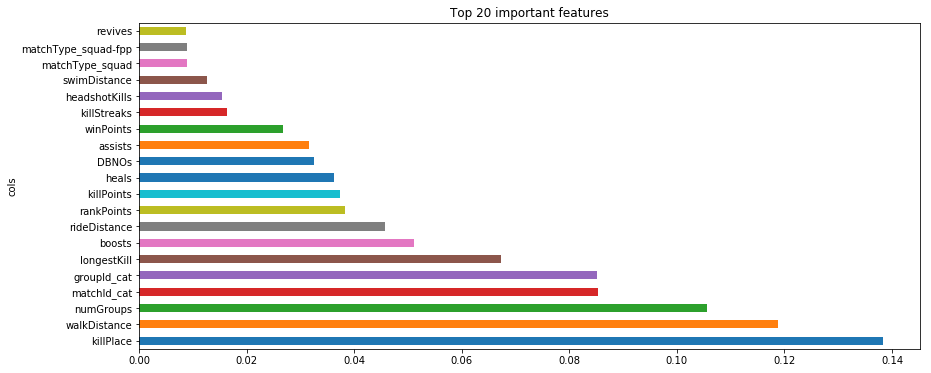

In [57]:
# What are the most predictive features according to our basic random forest model
fi = xgb_feat_importance(m1, original); fi[:10]

# Plot a feature importance graph for the 20 most important features
plot1 = fi[:20].plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh', title='Top 20 important features')

In [58]:
# Keep only significant features
#to_keep = fi[fi.imp>0.005].cols
to_keep = fi[fi.imp>0.015].cols
print('Significant features: ', len(to_keep))
to_keep.describe()

Significant features:  16


count            16
unique           16
top       killPlace
freq              1
Name: cols, dtype: object

In [59]:
sample = train.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
to_keep_drop_high_corr = list(set(list(to_keep)) - set(['killStreaks', 'damageDealt','maxPlace','numGroups', 'matchId_cat', 'groupId_cat']))
#original = original[to_keep_drop_high_corr]
original = original[to_keep]
target = sample['winPlacePerc'] # Only target variable

In [60]:
n_trn = len(original)-n_valid

# Split data
raw_train, raw_valid = split_vals(sample, n_trn)
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.fit_transform(X_valid)

original.columns

# Check dimensions of data
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

Sample train shape:  (90000, 16) 
Sample target shape:  (90000,) 
Sample validation shape:  (10000, 16)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [61]:
# You should get better results by increasing n_estimators
# and by playing around with the parameters
m4 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m4.fit(X_train, y_train)
print_score(m4)

['mae train: ', 0.05551868650188923, 'mae val: ', 0.06580659156355383]


In [62]:
## 바꿔야함
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

In [63]:
original = original.drop(columns = ['killStreaks', 'damageDealt','maxPlace','numGroups', 'matchId_cat', 'groupId_cat'])

In [64]:
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

Sample train shape:  (90000, 55) 
Sample target shape:  (90000,) 
Sample validation shape:  (10000, 55)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


In [65]:
# Train basic model
m5 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m5.fit(X_train, y_train)
print_score(m5)

['mae train: ', 0.050219405096807494, 'mae val: ', 0.06087608036241531]


In [66]:
## 바꿔야함
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

In [67]:
to_keep_ = ['assists', 'DBNOs', 'killPlace',
       'longestKill', 'numGroups', 
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'weaponsAcquiredNorm',
       'healsandboosts', 'totalDistance']
original = original[to_keep_]

In [68]:
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

Sample train shape:  (90000, 11) 
Sample target shape:  (90000,) 
Sample validation shape:  (10000, 11)


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [ ]:
# Train basic model
m6 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m6.fit(X_train, y_train)
print_score(m6)

In [ ]:
# 백만개로 training , validation split 
# test에도 

## Correlations
+ Correlation Heatmap

In [ ]:
# # Correlation heatmap
# corr = significant.corr()

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Create heatmap
# heatmap = sns.heatmap(corr)